In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [399]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [400]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [401]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [402]:
#Cual fue la regiòn de level 1 màs dañada?
train_values_with_damage = train_values.merge(train_labels,how='inner')
train_values_with_damage.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [403]:
#Cual fue la regiòn de level 1 mas dañada?
train_values_by_geo_level_one = train_values_with_damage.filter(items=['building_id','geo_level_1_id','damage_grade'])
train_values_by_geo_level_one.head()

,building_id,geo_level_1_id,damage_grade
0,802906,6,3
1,28830,8,2
2,94947,21,3
3,590882,22,2
4,201944,11,3


In [404]:
#Promedio de daño de todos los edificios
train_labels['damage_grade'].mean()

2.2382723013342236

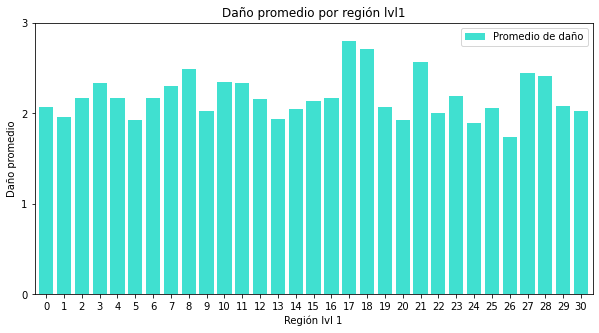

In [405]:
#Daño por region de level uno
train_values_by_geo_level_one=train_values_by_geo_level_one.filter(items=['geo_level_1_id','damage_grade']).groupby(['geo_level_1_id']).agg('mean').reset_index()
train_values_by_geo_level_one=train_values_by_geo_level_one.rename(columns={'damage_grade':'Promedio de daño','geo_level_1_id':'Region de nivel 1'})
g = train_values_by_geo_level_one.plot.bar\
(x='Region de nivel 1', y='Promedio de daño', rot=0,width=0.8,figsize=(10,5),color='#40E0D0',title='Daño promedio por región lvl1',xlabel='Región lvl 1',ylabel='Daño promedio')
g.set_yticks(range(0,4));

In [406]:
#Cual fueron las 3 regiones de level 1 màs dañada?
train_values_by_geo_level_one.loc[train_values_by_geo_level_one['Promedio de daño']==train_values_by_geo_level_one['Promedio de daño']].nlargest(3,columns='Promedio de daño')

,Region de nivel 1,Promedio de daño
17,17,2.794480
18,18,2.708373
21,21,2.563369


In [407]:
#Cual fueron las 3 regiones de level 1 menos dañada?
train_values_by_geo_level_one.loc[train_values_by_geo_level_one[
   'Promedio de daño']==train_values_by_geo_level_one['Promedio de daño']].nsmallest(3,columns='Promedio de daño')

,Region de nivel 1,Promedio de daño
26,26,1.730887
24,24,1.894656
5,5,1.919703


In [408]:
#promedio de daño por antiguedad de edificaciòn
train_values_by_age = train_values_with_damage.filter(items=['age','damage_grade'])
train_values_by_age = train_values_by_age.groupby('age').agg({'damage_grade':['mean','count']}).reset_index()
train_values_by_age.columns=['age','mean','count']
train_values_by_age = train_values_by_age.loc[train_values_by_age['count']>100]
#train_values_by_age = train_values_by_age.rename(columns={'damage_grade':'damage_grade_mean'})
train_values_by_age

,age,mean,count
0,0,1.957529,26041
1,5,2.103481,33697
2,10,2.200689,38896
3,15,2.263455,36010
4,20,2.300510,32182
5,25,2.329599,24366
6,30,2.349678,18028
7,35,2.351074,10710
8,40,2.369827,10559
9,45,2.354277,4711


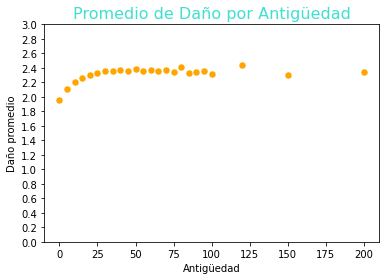

In [409]:
#eliminamos la edad de 995 para que se aprecie mejor la gràfica
train_values_by_age=train_values_by_age.drop(41)
g= sns.scatterplot(x='age',y='mean',data=train_values_by_age,color='orange',s=50)
g.set_title('Promedio de Daño por Antigüedad',fontsize=16,color='turquoise')
g.set_xlabel('Antigüedad')
g.set_ylabel('Daño promedio')
g.set_yticks([0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3]);

In [410]:
#Promedio de daño por geo lvl1 y condicion de la superficie terrestre
train_values_with_damage.filter(items=['damage_grade','land_surface_condition'])\
.groupby(['land_surface_condition']).agg('mean').rename(columns={'damage_grade':'Daño promedio'})

,Daño promedio
land_surface_condition,
n,2.251407
o,2.289081
t,2.234170


In [411]:
#Promedio de daño según el material de construcción
train_values_with_damage_material=train_values_with_damage.filter(items=['damage_grade','has_superstructure_adobe_mud',\
'has_superstructure_rc_engineered']).groupby(['has_superstructure_adobe_mud',\
'has_superstructure_rc_engineered']).agg('mean').iloc[::-1]
train_values_with_damage_material

damage_grade
has_superstructure_adobe_mud has_superstructure_rc_engineered              
1                            1                                     1.730769
                             0                                     2.347476
0                            1                                     1.373265
                             0                                     2.242754

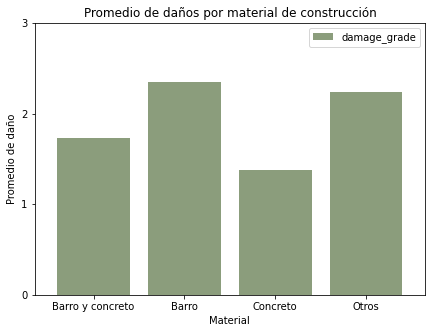

In [412]:
g= train_values_with_damage_material.plot.bar\
(y='damage_grade', rot=0,width=0.8,figsize=(7,5),color='#8B9D7C',title='Promedio de daños por material de construcción',xlabel='Material',ylabel='Promedio de daño')
g.set_yticks(range(0,4));
g.set_xticklabels(['Barro y concreto','Barro','Concreto','Otros']);

In [413]:
#Cantidad de familias que quedaron sin hogar. (Consideramos serious damage como hogar destruido)
cantidad_de_familias_por_daño =train_values_with_damage.filter(items=['damage_grade','count_families'])
familias_sin_hogar = cantidad_de_familias_por_daño.loc[cantidad_de_familias_por_daño['damage_grade']==3]
familias_sin_hogar['count_families'].sum()

87834

In [414]:
#cantidad de familias por tipo de daño
cantidad_de_familias_por_daño=cantidad_de_familias_por_daño.groupby('damage_grade').agg('sum')
cantidad_de_familias_por_daño

,count_families
damage_grade,
1,22991
2,145593
3,87834


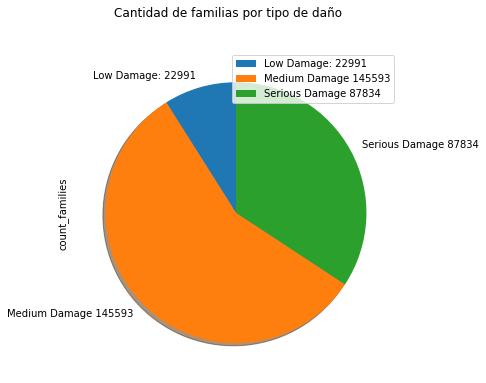

In [415]:
cantidad_de_familias_por_daño['count_families'].plot(kind='pie', subplots=True, \
shadow = True,startangle=90,figsize=(9,6),title='Cantidad de familias por tipo de daño',\
labels=['Low Damage: '+str(cantidad_de_familias_por_daño['count_families'][1]),\
'Medium Damage '+str(cantidad_de_familias_por_daño['count_families'][2]),\
'Serious Damage '+str(cantidad_de_familias_por_daño['count_families'][3])])
plt.legend(loc=1);

In [416]:
edificios_categoria_secundaria = train_values_with_damage.loc[(train_values_with_damage['has_secondary_use']==1),['has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other','damage_grade']]
cantidad_edificios_categoria_secundaria = edificios_categoria_secundaria.sum()
cantidad_edificios_categoria_secundaria = cantidad_edificios_categoria_secundaria.to_frame().rename(columns={0:'Total'})
cantidad_edificios_categoria_secundaria

,Total
has_secondary_use_agriculture,16777
has_secondary_use_hotel,8763
has_secondary_use_rental,2111
has_secondary_use_institution,245
has_secondary_use_school,94
has_secondary_use_industry,279
has_secondary_use_health_post,49
has_secondary_use_gov_office,38
has_secondary_use_use_police,23
has_secondary_use_other,1334


In [417]:
#Promedio de edificios destruidos por uso secundario
edificios_categoria_secundaria_destruidos =edificios_categoria_secundaria.loc[(train_values_with_damage['damage_grade']==3),:]
edificios_categoria_secundaria_destruidos=edificios_categoria_secundaria_destruidos.sum().to_frame().rename(columns={0:'Total Destruidos'})
cantidad_edificios_categoria_secundaria=cantidad_edificios_categoria_secundaria.drop('damage_grade')
edificios_categoria_secundaria_destruidos=edificios_categoria_secundaria_destruidos.drop('damage_grade')
promedio_destruidos = ((edificios_categoria_secundaria_destruidos['Total Destruidos']*100)/cantidad_edificios_categoria_secundaria['Total']).to_frame().rename(columns={0:'Promedio'})
promedio_destruidos

,Promedio
has_secondary_use_agriculture,31.406092
has_secondary_use_hotel,16.991898
has_secondary_use_rental,8.668877
has_secondary_use_institution,6.938776
has_secondary_use_school,18.085106
has_secondary_use_industry,24.372760
has_secondary_use_health_post,10.204082
has_secondary_use_gov_office,10.526316
has_secondary_use_use_police,30.434783
has_secondary_use_other,23.013493


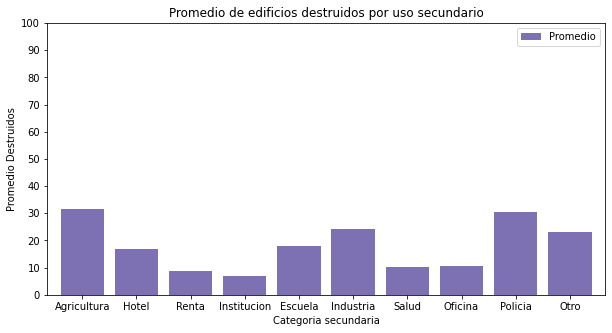

In [418]:
g=promedio_destruidos.plot.bar\
(y='Promedio', rot=0,width=0.8,figsize=(10,5),color='#7D71B4',title='Promedio de edificios destruidos por uso secundario',xlabel='Categoria secundaria',ylabel='Promedio Destruidos')
g.set_xticklabels(['Agricultura','Hotel','Renta','Institucion','Escuela','Industria','Salud','Oficina','Policia','Otro'])
g.set_yticks(range(0,101,10));

In [419]:
#Damage Grade por Plan Configuration
train_values_with_damage['Cantidad']=1
plan_config_por_grade_damage_mean = train_values_with_damage.filter(items=['plan_configuration','damage_grade']).groupby(['plan_configuration']).agg('mean').rename(columns={'damage_grade':'damage_grade_mean'})
plan_config_por_grade_damage_mean

,damage_grade_mean
plan_configuration,
a,1.853175
c,1.836923
d,2.243646
f,2.272727
m,1.913043
n,2.157895
o,1.893082
q,2.271434
s,2.049133


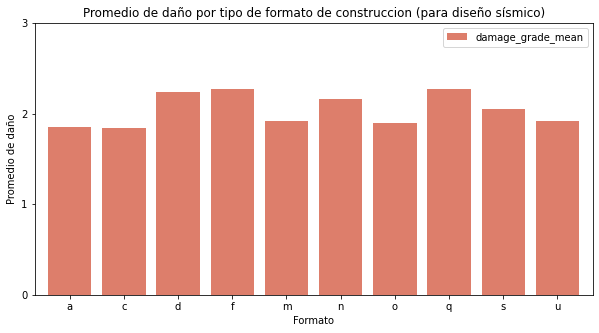

In [420]:
g= plan_config_por_grade_damage_mean.plot.bar\
(y='damage_grade_mean', rot=0,width=0.8,figsize=(10,5),color='#dd7e6b',title='Promedio de daño por tipo de formato de construccion (para diseño sísmico)',xlabel='Formato',ylabel='Promedio de daño')
g.set_yticks(range(0,4));

In [421]:
#
train_values_with_damage_in17 = train_values_with_damage.loc[train_values_with_damage['geo_level_1_id']==17,:]
train_values_with_damage3_in17 = train_values_with_damage_in17.loc[train_values_with_damage_in17['damage_grade']==3,['count_families','has_secondary_use','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']]
train_values_with_damage3_in17.sum()

count_families                            18075
has_secondary_use                          1668
has_superstructure_adobe_mud                537
has_superstructure_mud_mortar_stone       17094
has_superstructure_stone_flag              1125
has_superstructure_cement_mortar_stone      147
has_superstructure_mud_mortar_brick         205
has_superstructure_cement_mortar_brick      155
has_superstructure_timber                  3106
has_superstructure_bamboo                   890
has_superstructure_rc_non_engineered         68
has_superstructure_rc_engineered             11
has_superstructure_other                     14
dtype: int64

In [422]:
total_edificios_destruidos = train_values_with_damage3_in17['count_families'].count()

In [423]:
total_edificios = train_values_with_damage_in17['count_families'].count()

In [424]:
total_edificios_destruidos*100/total_edificios

80.75459588318893